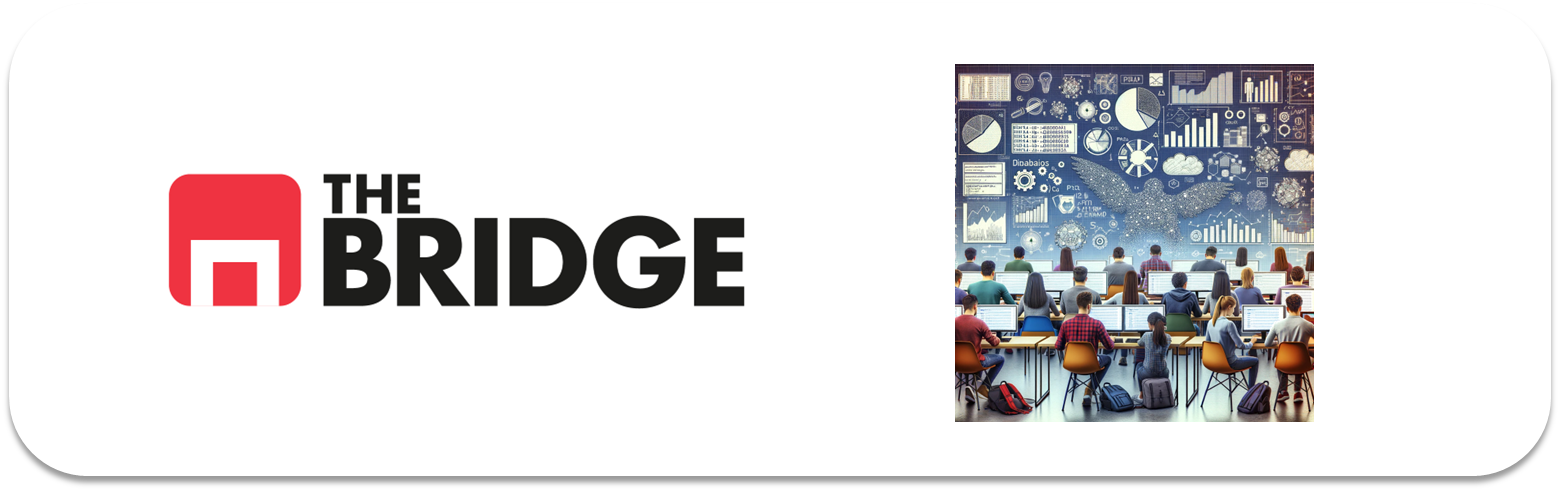

## PRACTICA OBLIGATORIA: **Regresion Lineal y Regularización**

* La práctica obligatoria de esta unidad consiste en hacer un modelado completo de un problema que ya conoces, la predicción de casas, pero con otro dataset. Descarga este notebook en tu ordenador y trabaja en local. Ten en cuenta que tendrás que descar los directorios de imágenes y datos adicionales, si los hubiera.
* Recuerda que debes subirla a tu repositorio personal antes de la sesión en vivo para que puntúe adecuadamente.  
* Recuerda también que no es necesario que esté perfecta, sólo es necesario que se vea el esfuerzo. 
* Esta práctica se resolverá en la sesión en vivo correspondiente y la solución se publicará en el repo del curso. 

### Modelo de Regresión Lineal

El objetivo del modelo que tienes que construir es predecir la mediana del precio de las casas en una zona del área metropolitana de Boston dadas las características de las mismas. Sí, es parecido pero no igual a lo que hemos venido haciendo.

Aquí tienes una descripción de las variables del dataset, del que tendrás que decidir el target:  

***CRIM:*** Tasa de criminalidad per cápita por ciudad  
***ZN:*** Proporción de terreno residencial destinado a lotes de más de 25,000 pies cuadrados  
***INDUS:*** Proporción de acres de negocios no minoristas por ciudad  
***CHAS:*** Variable ficticia del río Charles (= 1 si el sector limita con el río; 0 en caso contrario)  
***NOX:*** Concentración de óxidos de nitrógeno (partes por 10 millones)  
***RM:*** Número promedio de habitaciones por vivienda  
***AGE:*** Proporción de unidades ocupadas por el propietario construidas antes de 1940  
***DIS:*** Distancias ponderadas a cinco centros de empleo de Boston  
***RAD:*** Índice de accesibilidad a autopistas radiales  
***TAX:*** Tasa de impuesto sobre la propiedad de valor total por $10,000  
***PTRATIO:*** Relación alumno-maestro por ciudad  
***LSTAT:*** % de población de estatus socioeconómico bajo  
***MEDV:*** Valor medio de las viviendas ocupadas por sus propietarios en miles de dólares  

### Indicaciones

A continuación tienes las indicaciones para hacer el modelado. No necesariamente tienes que seguirlos al pie de la letra, porque a partir de ahora ya las práctica obligatorias dejarán de ser mayormente guiadas por ejercicios y serán más de libre desarrollo, aunque con objetivos específicos, claros y determinados. 

En concreto se pide hacer un modelo de regresión lineal, evaluarlo contra un dataset de test reservado del original mostrando MAE,RMSE,MSE y $R2$, comparar las predicciones con los valores reales y realizar al menos un tipo de regularización de las conocidas, testando por lo menos 3 valores diferentes de hiperparámetros.

Los pasos para guiar el trabajo:
1. Carga el dataset. Está limpio y no necesitarás completar nulos, ni repasar los valores de las columnas.
2. Escoge y analiza la variable target de forma gráfica para ver la idoneidad de hacer un modelo de regresión.
3. Haz el split en train y test que creas conveniente y de la forma que creas conveniente.
4. Construye las parejas X,y de train y test
5. Haz un mini-EDA, selecciona las features que quieres quedarte y por qué.
6. Trata las variables para que funcionen lo mejor posible en el modelo.
7. Construye un modelo de regresión lineal.
8. Analiza si lo crees conveniente los pesos y la importancia de las features.
8. Evalúa tu modelo. Haz un pequeño assesmente de su generabilidad. Compara gráficamente las predicciones con los valores reales.
9. Regulariza al menos con un modelo alternativo y juega con 3 posibles valores de los hiperparámetros del modelo de regularización.
10. Expresa tus conclusiones, en concreto ¿con qué modelo te quedarías?¿por qué?



### REALIZACIÓN DE LA TAREA

#### 1) Importamos las librerías necesarias y cargamos el dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [14]:
df = pd.read_csv("data/hard_to_find/obligatoria_hard.csv", sep = '|')
print("El tanmaño del dataset es: ",df.shape)
df.head(10)


El tanmaño del dataset es:  (506, 13)


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2
5,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3.0,222.0,18.7,5.21,28.7
6,0.08829,12.5,7.87,0.0,0.524,6.012,66.6,5.5605,5.0,311.0,15.2,12.43,22.9
7,0.14455,12.5,7.87,0.0,0.524,6.172,96.1,5.9505,5.0,311.0,15.2,19.15,27.1
8,0.21124,12.5,7.87,0.0,0.524,5.631,100.0,6.0821,5.0,311.0,15.2,29.93,16.5
9,0.17004,12.5,7.87,0.0,0.524,6.004,85.9,6.5921,5.0,311.0,15.2,17.10,18.9


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  LSTAT    506 non-null    float64
 12  MEDV     506 non-null    float64
dtypes: float64(13)
memory usage: 51.5 KB


#### 2) Miramos la distribución del target (MEDV) para ver si tiene sentido un modelo de regresión

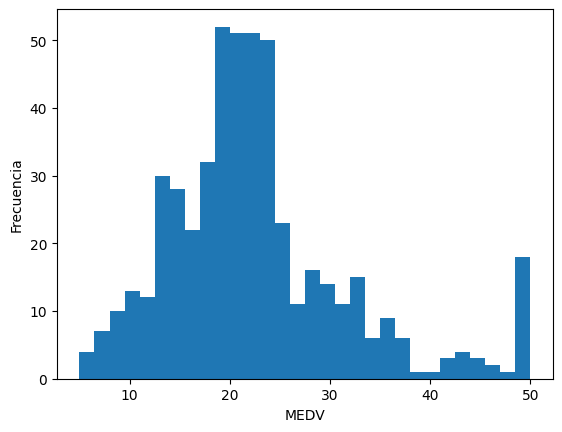

In [5]:
plt.figure()
plt.hist(df["MEDV"], bins=30)
plt.xlabel("MEDV")
plt.ylabel("Frecuencia")
plt.show()


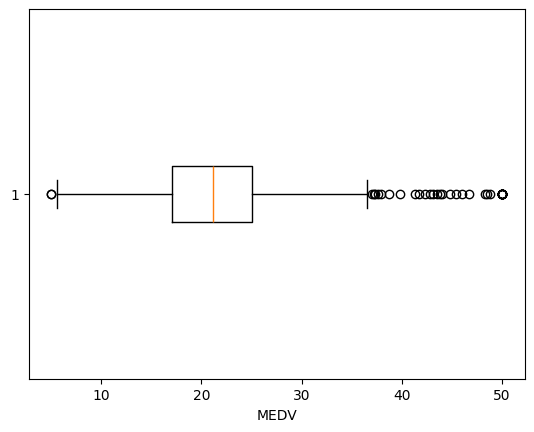

In [6]:
plt.figure()
plt.boxplot(df["MEDV"], vert=False)
plt.xlabel("MEDV")
plt.show()


#### 3 y 4) Split train/test

In [ ]:
target = "MEDV"
X = df.drop(columns=[target])
y = df[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


#### 5) Mini-EDA y selección de features

MEDV       1.000000
RM         0.695360
ZN         0.360445
DIS        0.249929
CHAS       0.175260
AGE       -0.376955
RAD       -0.381626
CRIM      -0.388305
NOX       -0.427321
TAX       -0.468536
INDUS     -0.483725
PTRATIO   -0.507787
LSTAT     -0.737663
Name: MEDV, dtype: float64


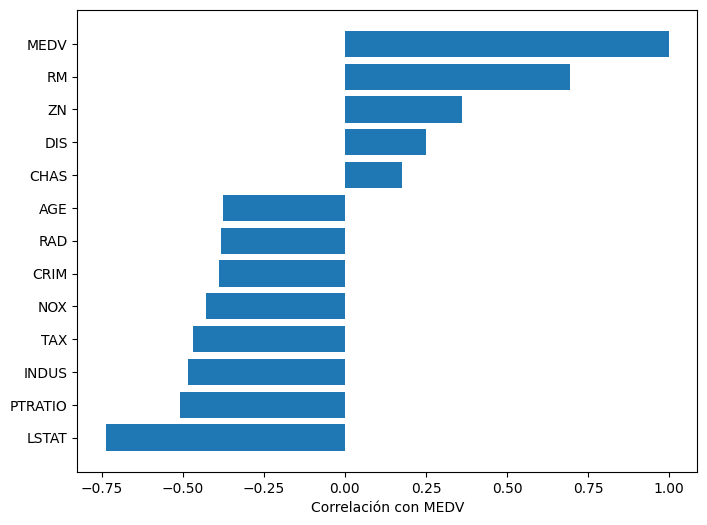

In [9]:
corr = df.corr(numeric_only=True)[target].sort_values(ascending=False)
print(corr)
plt.figure(figsize=(8, 6))
plt.barh(corr.index, corr.values)
plt.gca().invert_yaxis()
plt.xlabel("Correlación con MEDV")
plt.show()



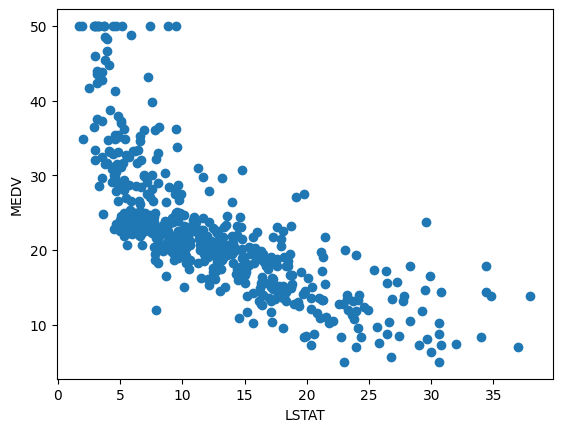

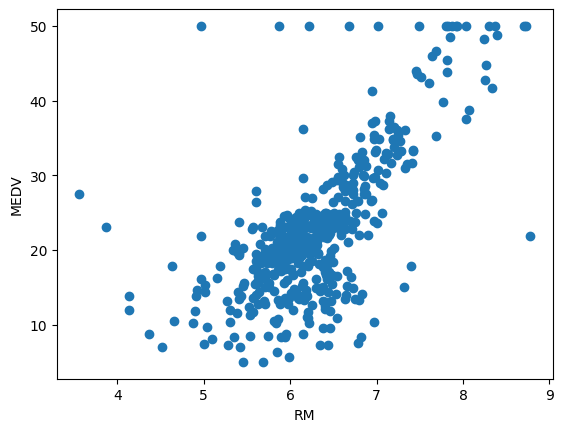

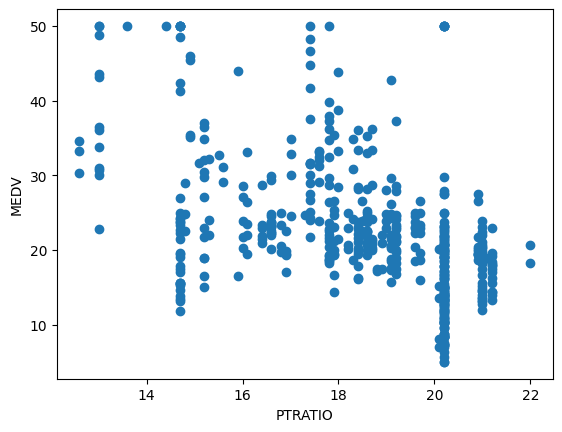

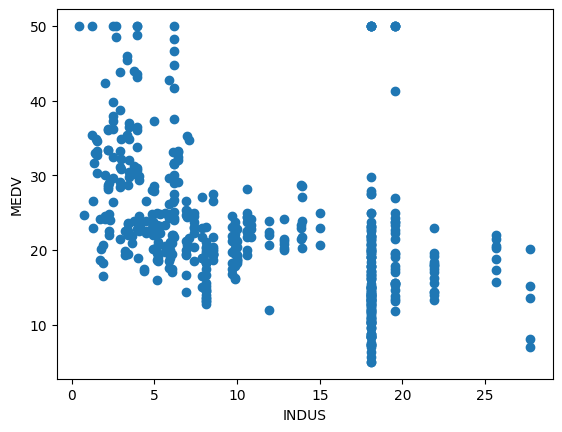

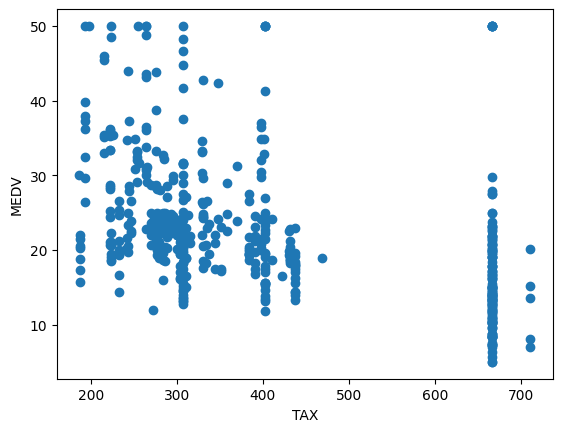

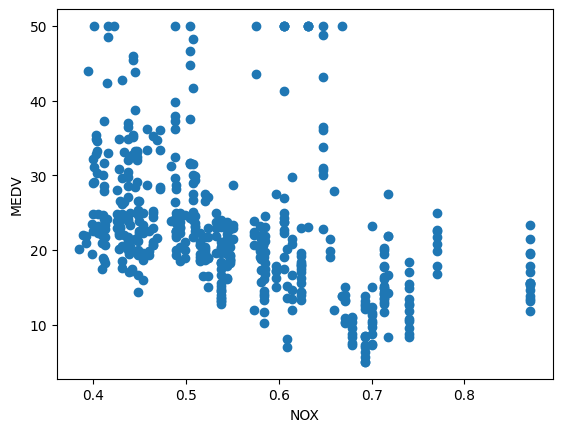

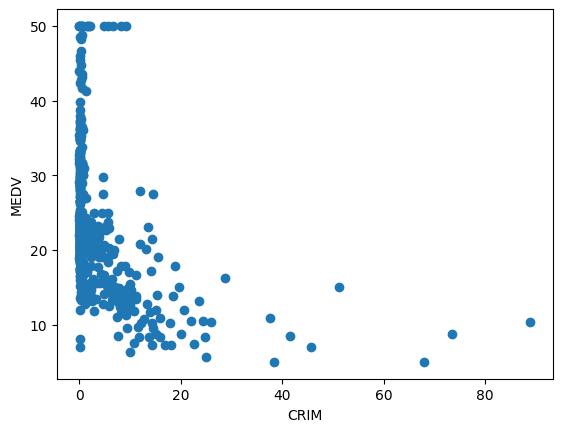

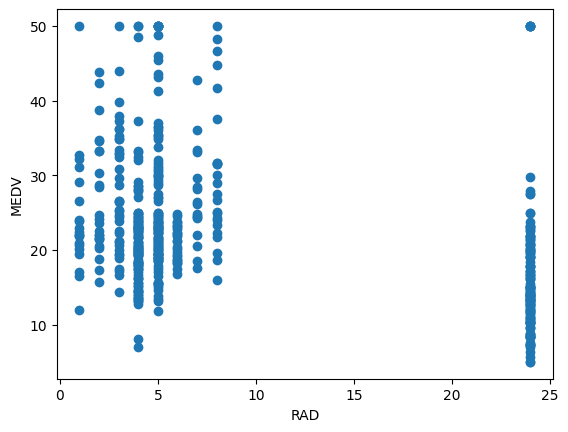

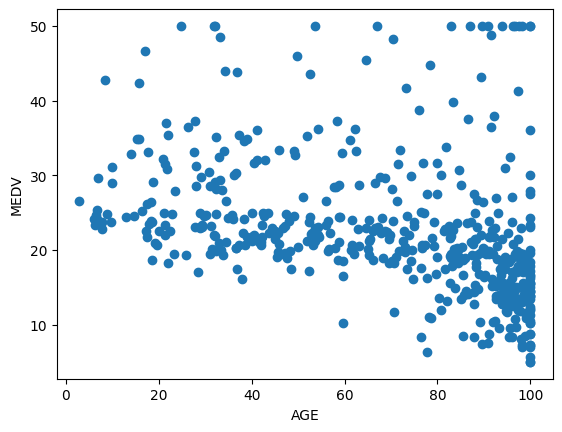

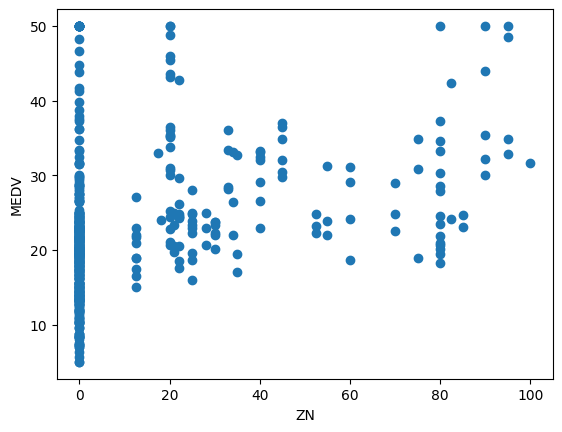

In [11]:
for col in ["LSTAT","RM","PTRATIO","INDUS","TAX","NOX","CRIM","RAD","AGE","ZN"]:
    plt.figure()
    plt.scatter(df[col], df["MEDV"])
    plt.xlabel(col)
    plt.ylabel("MEDV")
    plt.show()


Selección final:

Me quedo con estas 10 features porque tienen correlación relativamente alta con MEDV
y cubren distintos aspectos (tamaño vivienda, entorno, contaminación, impuestos y accesibilidad).
Vemos que RAD aunque es numérica parece categórica porque tiene valores concretos. En principio la dejamos así porque podría generar muchos valores, pero podríamso probar en un futuro a tratarla con one-hot.


In [12]:
features = ["LSTAT","RM","PTRATIO","INDUS","TAX","NOX","CRIM","RAD","AGE","ZN"]

#### 6) Tratamiento de variables
Voy a estandarizar las variables porque tienen escalas muy distintas (por ejemplo TAX o RAD). Todas son numéricas

In [16]:
scaler = StandardScaler()

X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train[features]),columns=features,index=X_train.index)
X_test_scaled = pd.DataFrame(scaler.transform(X_test[features]),columns=features,index=X_test.index)

Estandarizo las variables numéricas porque están en escalas muy distintas y eso afecta sobre todo a Ridge y Lasso.
Ajusto el scaler solo con train y lo aplico a test.

#### 7) Modelo de regresión lineal
Entreno una regresión lineal con las variables escaladas.

In [17]:
lin = LinearRegression()
lin.fit(X_train_scaled, y_train)

,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"tol tol: float, default=1e-6The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for the `lsqr` solver.`tol` is set as `atol` and `btol` of :func:`scipy.sparse.linalg.lsqr` whenfitting on sparse training data. This parameter has no effect when fittingon dense data... versionadded:: 1.7",1e-06
,"n_jobs n_jobs: int, default=NoneThe number of jobs to use for the computation. This will only providespeedup in case of sufficiently large problems, that is if firstly`n_targets > 1` and secondly `X` is sparse or if `positive` is setto `True`. ``None`` means 1 unless in a:obj:`joblib.parallel_backend` context. ``-1`` means using allprocessors. See :term:`Glossary ` for more details.",None
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive. Thisoption is only supported for dense arrays.For a comparison between a linear regression model with positive constraintson the regression coefficients and a linear regression without such constraints,see :ref:`sphx_glr_auto_examples_linear_model_plot_nnls.py`... versionadded:: 0.24",False


#### 8) Pesos y laimportancia
Miro los coeficientes para ver qué variables empujan MEDV hacia arriba o hacia abajo.
Como he escalado, los coeficientes son comparables.

   feature      coef
0    LSTAT -4.030031
2  PTRATIO -2.288389
4      TAX -1.927410
5      NOX -1.131697
6     CRIM -0.986263
9       ZN -0.278747
8      AGE  0.798769
3    INDUS  0.851492
7      RAD  2.166272
1       RM  3.309842


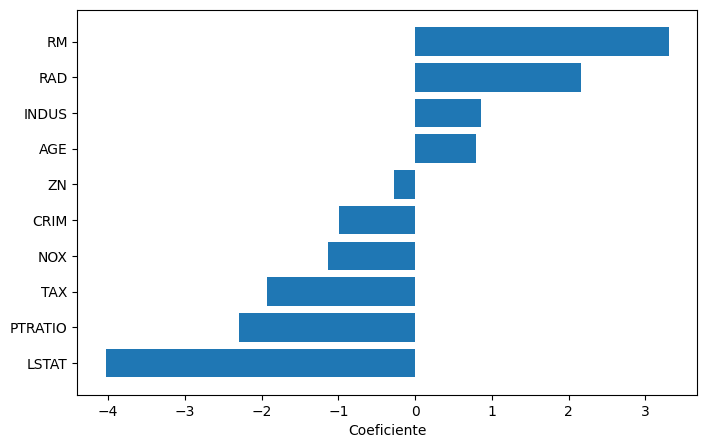

In [18]:
coef_df = pd.DataFrame({"feature": features, "coef": lin.coef_}).sort_values("coef")
print(coef_df)
plt.figure(figsize=(8, 5))
plt.barh(coef_df["feature"], coef_df["coef"])
plt.xlabel("Coeficiente")
plt.show()


#### 9) Evaluación y generalización
Evalúo el modelo en test con MAE, RMSE y R2 para estimar cómo generaliza

In [19]:
y_pred_lin = lin.predict(X_test_scaled)

mae_lin = mean_absolute_error(y_test, y_pred_lin)
rmse_lin = np.sqrt(mean_squared_error(y_test, y_pred_lin))
r2_lin = r2_score(y_test, y_pred_lin)

mae_lin, rmse_lin, r2_lin

(3.2595252070494234, np.float64(5.111621178789712), 0.6437021254129383)

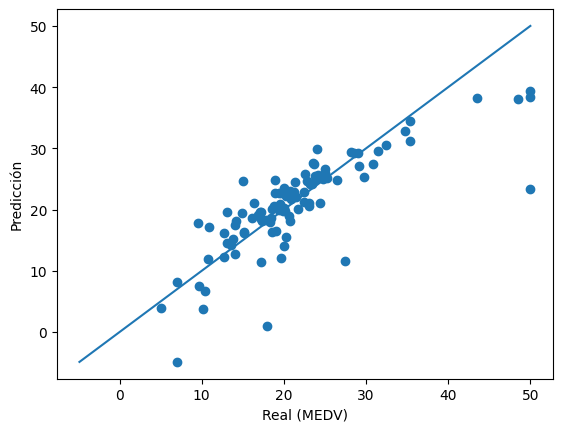

In [20]:
plt.figure()
plt.scatter(y_test, y_pred_lin)
plt.xlabel("Real (MEDV)")
plt.ylabel("Predicción")
m = min(y_test.min(), y_pred_lin.min())
M = max(y_test.max(), y_pred_lin.max())
plt.plot([m, M], [m, M])
plt.show()


Conclusión: el modelo tiene un error medio absoluto alrededor de 3.26 y un RMSE de aprox 5.11.
El R2 de aprox 0.64 indica que explica una parte razonable de la variabilidad, pero todavía hay bastante error.
La nube de puntos sigue bastante la diagonal, así que el modelo captura la tendencia general.
Se ve que para valores altos de MEDV hay más dispersión, lo que sugiere que el modelo tiene más dificultad en viviendas caras.


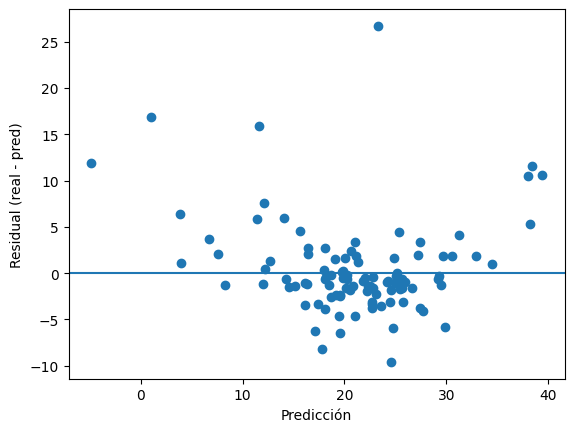

In [21]:
residuals_lin = y_test - y_pred_lin

plt.figure()
plt.scatter(y_pred_lin, residuals_lin)
plt.axhline(0)
plt.xlabel("Predicción")
plt.ylabel("Residual (real - pred)")
plt.show()


La mayoría de los puntos están alrededor de 0, así que el modelo no tiene un sesgo enorme general.
Aun así, aparecen algunos residuales muy grandes y parece que para predicciones altas hay más dispersión, lo que sugiere que el modelo falla más en viviendas caras.
No se ve una forma súper clara, pero sí cierta variación del error según el rango de predicción.

#### 10) Regularización
Primero pruebo Ridge con un alpha fijo y comparo métricas en train y en test.
Luego hago lo mismo con Lasso.

Ridge (alpha inicial)

Entreno Ridge y miro métricas en train para ver el ajuste

In [22]:
ridge_reg = Ridge(alpha=10, random_state=42)
ridge_reg.fit(X_train_scaled, y_train)

y_pred_train_ridge = ridge_reg.predict(X_train_scaled)

mse_train_ridge = mean_squared_error(y_train, y_pred_train_ridge)
rmse_train_ridge = np.sqrt(mse_train_ridge)
mae_train_ridge = mean_absolute_error(y_train, y_pred_train_ridge)
r2_train_ridge = r2_score(y_train, y_pred_train_ridge)

mse_train_ridge, rmse_train_ridge, mae_train_ridge, r2_train_ridge


(25.636852638262926,
 np.float64(5.063284767644708),
 3.5851565663181253,
 0.7048941159533919)

In [23]:
y_pred_test_ridge = ridge_reg.predict(X_test_scaled)

mse_test_ridge = mean_squared_error(y_test, y_pred_test_ridge)
rmse_test_ridge = np.sqrt(mse_test_ridge)
mae_test_ridge = mean_absolute_error(y_test, y_pred_test_ridge)
r2_test_ridge = r2_score(y_test, y_pred_test_ridge)

mse_test_ridge, rmse_test_ridge, mae_test_ridge, r2_test_ridge


(26.46390251487834,
 np.float64(5.14430777800846),
 3.270544141361516,
 0.6391308156430069)

Lasso (alpha inicial)

Entreno Lasso y miro métricas en train.

In [24]:
lasso_reg = Lasso(alpha=0.1, max_iter=20000, random_state=42)
lasso_reg.fit(X_train_scaled, y_train)

y_pred_train_lasso = lasso_reg.predict(X_train_scaled)

mse_train_lasso = mean_squared_error(y_train, y_pred_train_lasso)
rmse_train_lasso = np.sqrt(mse_train_lasso)
mae_train_lasso = mean_absolute_error(y_train, y_pred_train_lasso)
r2_train_lasso = r2_score(y_train, y_pred_train_lasso)

mse_train_lasso, rmse_train_lasso, mae_train_lasso, r2_train_lasso


(26.16055306747006,
 np.float64(5.114738807355666),
 3.6001587447628767,
 0.6988657988148794)

In [25]:
y_pred_test_lasso = lasso_reg.predict(X_test_scaled)

mse_test_lasso = mean_squared_error(y_test, y_pred_test_lasso)
rmse_test_lasso = np.sqrt(mse_test_lasso)
mae_test_lasso = mean_absolute_error(y_test, y_pred_test_lasso)
r2_test_lasso = r2_score(y_test, y_pred_test_lasso)

mse_test_lasso, rmse_test_lasso, mae_test_lasso, r2_test_lasso


(27.446446924636557,
 np.float64(5.2389356671595575),
 3.3293665421446974,
 0.6257325649675962)

In [26]:
alphas = [0.1, 1.0, 10.0]
rows = []

for a in alphas:
    model = Ridge(alpha=a, random_state=42)
    model.fit(X_train_scaled, y_train)
    pred = model.predict(X_test_scaled)
    mae = mean_absolute_error(y_test, pred)
    rmse = np.sqrt(mean_squared_error(y_test, pred))
    r2 = r2_score(y_test, pred)
    rows.append(("Ridge", a, mae, rmse, r2))

for a in alphas:
    model = Lasso(alpha=a, max_iter=20000, random_state=42)
    model.fit(X_train_scaled, y_train)
    pred = model.predict(X_test_scaled)
    mae = mean_absolute_error(y_test, pred)
    rmse = np.sqrt(mean_squared_error(y_test, pred))
    r2 = r2_score(y_test, pred)
    rows.append(("Lasso", a, mae, rmse, r2))
    
results_reg = pd.DataFrame(rows, columns=["model", "alpha", "MAE", "RMSE", "R2"])
results_reg.sort_values(["R2", "RMSE"], ascending=[False, True])


,model,alpha,MAE,RMSE,R2
0,Ridge,0.1,3.259763,5.112067,0.643640
1,Ridge,1.0,3.261732,5.115947,0.643099
2,Ridge,10.0,3.270544,5.144308,0.639131
4,Lasso,1.0,3.472241,5.235653,0.626201
3,Lasso,0.1,3.329367,5.238936,0.625733
5,Lasso,10.0,6.255844,8.662877,-0.023341


Comparando con la regresión lineal (MAE ≈ 3.26, RMSE ≈ 5.11, R2 ≈ 0.64), Ridge con alpha pequeño (0.1 o 1.0) sale prácticamente igual.
De hecho, Ridge 0.1 es el mejor de Ridge y empata casi exactamente al modelo lineal, así que la regularización no aporta una mejora clara en este caso.

Lasso funciona peor que Ridge y que la lineal para todos los alphas probados: sube el RMSE, baja el R2 y con alpha=10 se rompe (R2 negativo), lo que indica que está regularizando demasiado y perdiendo información importante.
Además, el hecho de que Lasso empeore sugiere que aquí no conviene forzar selección de variables: todas aportan algo y eliminarlas perjudica.

En resumen, me quedo con el modelo lineal o con Ridge(alpha=0.1) porque dan el mejor rendimiento en test (R2 más alto y RMSE más bajo).
Si tengo que elegir uno “final”, escogería Ridge(alpha=0.1) por estabilidad (coeficientes más controlados) aunque la mejora respecto a lineal es mínima.


La diferencia entre train y test en Ridge y Lasso no es enorme, así que no parece que haya un sobreajuste fuerte.
El límite principal es que el modelo lineal no captura toda la complejidad del problema (se ve en el scatter y en algunos residuales/outliers), por eso el R2 se queda alrededor de 0.64.
La regularización no lo arregla porque el problema no es tanto “coeficientes demasiado grandes”, sino que la relación real puede no ser totalmente lineal y hay valores extremos.


## Modelo elegido

Me quedo con Ridge(alpha=0.1) porque obtiene el mejor equilibrio en test (R2 más alto y RMSE más bajo, prácticamente igual que la lineal) y además la regularización hace el modelo más estable. No elijo Lasso porque empeora las métricas y con alpha alto pierde demasiada información.
